# Library

In [ ]:
from sklearn.tree import DecisionTreeClassifier  # sotring whole algo
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
#tree #KNN #Log #GAussinab #Rf #SVC #SVM
from sys import argv
from sklearn import metrics
import numpy as np   # array
import pandas as pd  # read + plot
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.metrics import classification_report,confusion_matrix #report
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import LabelEncoder #convert data
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn import svm
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import f1_score, precision_score, recall_score, log_loss, accuracy_score, matthews_corrcoef, roc_auc_score, cohen_kappa_score
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
import pandas as pd
from imblearn.over_sampling import ADASYN, SMOTE, SMOTENC
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, ClusterCentroids, NearMiss, EditedNearestNeighbours
from imblearn.pipeline import Pipeline
from imblearn.datasets import make_imbalance
from sklearn.utils import class_weight
from sklearn.ensemble import RandomForestClassifier



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
tdf1= pd.read_csv('/content/drive/MyDrive/a new RNA m6A/m5U/FULL/FUll separete dataset/ALL test F (Processed).csv')

#train
df1= pd.read_csv("/content/drive/MyDrive/a new RNA m6A/m5U/FULL/FUll separete dataset/ALL F features in one.csv")

X_train1 = df1.drop('Target', axis=1)
y_train1 = df1['Target']
#--------------------------------------------

X_test1 = tdf1.drop('Target', axis=1)
y_test1 = tdf1['Target']
#--------------------------------------------


# **GRU model cv**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout, Conv1D, MaxPooling1D, Flatten, BatchNormalization, Activation
from keras.metrics import AUC
from sklearn.metrics import accuracy_score, matthews_corrcoef, cohen_kappa_score, roc_auc_score, confusion_matrix, average_precision_score

# Load the data
tdf1 = pd.read_csv('/content/drive/MyDrive/a new RNA m6A/m5U/FULL/FUll separete dataset/ALL test F.csv')
df1 = pd.read_csv("/content/drive/MyDrive/a new RNA m6A/m5U/FULL/FUll separete dataset/ALL F features in one.csv")

# Combine train and test data for cross-validation
X = pd.concat([df1.drop('Target', axis=1), tdf1.drop('Target', axis=1)], axis=0)
y = pd.concat([df1['Target'], tdf1['Target']], axis=0)

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Create a GRU modelG with additional layers
modelG = Sequential()

modelG.add(Conv1D(filters=64, kernel_size=3, input_shape=(X.shape[1], 1)))
modelG.add(BatchNormalization())
modelG.add(Activation('sigmoid'))
modelG.add(MaxPooling1D(pool_size=2))

modelG.add(Conv1D(filters=128, kernel_size=3))
modelG.add(BatchNormalization())
modelG.add(Activation('relu'))
modelG.add(MaxPooling1D(pool_size=2))

modelG.add(Conv1D(filters=64, kernel_size=3))
modelG.add(BatchNormalization())
modelG.add(Activation('relu'))
modelG.add(MaxPooling1D(pool_size=2))

modelG.add(GRU(128, return_sequences=True))
modelG.add(GRU(64))
modelG.add(Dense(64))
modelG.add(BatchNormalization())
modelG.add(Activation('relu'))
modelG.add(Dropout(0.5))

modelG.add(Dense(1, activation='sigmoid'))

# Compile the modelG
modelG.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', AUC()])

# Reshape data for GRU
X = X.reshape(X.shape[0], X.shape[1], 1)

# Initialize K-fold cross-validation
n_splits = 10  # You can adjust the number of splits
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store evaluation metrics
accuracies = []
mccs = []
kappas = []
specificities = []
sensitivities = []
aurocs = []
average_precisions = []

# Perform K-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the modelG
    modelG.fit(X_train, y_train, epochs=10, batch_size=128, verbose=0)

    # Generate predictions on the test data
    y_pred = modelG.predict(X_test)
    y_pred_binary = (y_pred > 0.5).astype(int)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred_binary)
    mcc = matthews_corrcoef(y_test, y_pred_binary)
    kappa = cohen_kappa_score(y_test, y_pred_binary)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_binary).ravel()
    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)
    auroc = roc_auc_score(y_test, y_pred)
    average_precision = average_precision_score(y_test, y_pred)

    # Append metrics to lists
    accuracies.append(accuracy)
    mccs.append(mcc)
    kappas.append(kappa)
    specificities.append(specificity)
    sensitivities.append(sensitivity)
    aurocs.append(auroc)
    average_precisions.append(average_precision)

# Print average metrics
print(f'Average Accuracy: {np.mean(accuracies):.4f}')
print(f'Average MCC: {np.mean(mccs):.4f}')
print(f'Average Kappa Score: {np.mean(kappas):.4f}')
print(f'Average Specificity: {np.mean(specificities):.4f}')
print(f'Average Sensitivity: {np.mean(sensitivities):.4f}')
print(f'Average AUROC: {np.mean(aurocs):.4f}')
print(f'Average Average Precision: {np.mean(average_precisions):.4f}')


18/18 [==============================] - 0s 6ms/step
Average Accuracy: 0.9542
Average MCC: 0.9004
Average Kappa Score: 0.8870
Average Specificity: 0.9799
Average Sensitivity: 0.9065
Average AUROC: 0.9849
Average Average Precision: 0.9775


# indepensent test

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout, Conv1D, MaxPooling1D, Flatten, BatchNormalization, Activation
from keras.metrics import AUC
from sklearn.metrics import accuracy_score, matthews_corrcoef, cohen_kappa_score, roc_auc_score, confusion_matrix, average_precision_score

# Read data
tdf1 = pd.read_csv('/content/drive/MyDrive/a new RNA m6A/m5U/FULL/FUll separete dataset/ALL test F (Processed).csv')
df1 = pd.read_csv("/content/drive/MyDrive/a new RNA m6A/m5U/FULL/FUll separete dataset/ALL F features in one.csv")

# Train
X_train1 = df1.drop('Target', axis=1)
y_train1 = df1['Target']

# Test
X_test1 = tdf1.drop('Target', axis=1)
y_test1 = tdf1['Target']

# Standardize the data
scaler = StandardScaler()
X_train1 = scaler.fit_transform(X_train1)
X_test1 = scaler.transform(X_test1)

# Reshape data for GRU
X_train1 = X_train1.reshape(X_train1.shape[0], X_train1.shape[1], 1)
X_test1 = X_test1.reshape(X_test1.shape[0], X_test1.shape[1], 1)



# Create a GRU modelG with additional layers
modelG = Sequential()

modelG.add(Conv1D(filters=64, kernel_size=3, input_shape=(X_train1.shape[1], 1)))
modelG.add(BatchNormalization())
modelG.add(Activation('sigmoid'))
modelG.add(MaxPooling1D(pool_size=2))

modelG.add(Conv1D(filters=128, kernel_size=3))
modelG.add(BatchNormalization())
modelG.add(Activation('relu'))
modelG.add(MaxPooling1D(pool_size=2))

modelG.add(Conv1D(filters=64, kernel_size=3))
modelG.add(BatchNormalization())
modelG.add(Activation('relu'))
modelG.add(MaxPooling1D(pool_size=2))

modelG.add(GRU(128, return_sequences=True))
modelG.add(GRU(64))
modelG.add(Dense(64))
modelG.add(BatchNormalization())
modelG.add(Activation('relu'))
modelG.add(Dropout(0.5))

modelG.add(Dense(1, activation='sigmoid'))

# Compile the modelG
modelG.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', AUC()])

# Train the modelG on the entire training dataset
modelG.fit(X_train1, y_train1, epochs=50, batch_size=32, verbose=1)

# Generate predictions on the test data
y_pred = modelG.predict(X_test1)
y_pred_binary = (y_pred).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test1, y_pred_binary)
mcc = matthews_corrcoef(y_test1, y_pred_binary)
kappa = cohen_kappa_score(y_test1, y_pred_binary)
tn, fp, fn, tp = confusion_matrix(y_test1, y_pred_binary).ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
auroc = roc_auc_score(y_test1, y_pred)
average_precision = average_precision_score(y_test1, y_pred)

# Print metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'MCC: {mcc:.4f}')
print(f'Kappa Score: {kappa:.4f}')
print(f'Specificity: {specificity:.4f}')
print(f'Sensitivity: {sensitivity:.4f}')
print(f'AUROC: {auroc:.4f}')
print(f'Average Precision: {average_precision:.4f}')


Epoch 1/50
138/138 [==============================] - 9s 15ms/step - loss: 0.5446 - accuracy: 0.7384 - auc_2: 0.7986
Epoch 2/50
138/138 [==============================] - 2s 14ms/step - loss: 0.4247 - accuracy: 0.8037 - auc_2: 0.8730
Epoch 3/50
138/138 [==============================] - 2s 14ms/step - loss: 0.3937 - accuracy: 0.8317 - auc_2: 0.8923
Epoch 4/50
138/138 [==============================] - 2s 18ms/step - loss: 0.3414 - accuracy: 0.8578 - auc_2: 0.9201
Epoch 5/50
138/138 [==============================] - 5s 33ms/step - loss: 0.3024 - accuracy: 0.8763 - auc_2: 0.9368
Epoch 6/50
138/138 [==============================] - 4s 28ms/step - loss: 0.2642 - accuracy: 0.8933 - auc_2: 0.9517
Epoch 7/50
138/138 [==============================] - 4s 27ms/step - loss: 0.2341 - accuracy: 0.9079 - auc_2: 0.9617
Epoch 8/50
138/138 [==============================] - 4s 27ms/step - loss: 0.1960 - accuracy: 0.9299 - auc_2: 0.9734
Epoch 9/50
138/138 [==============================] - 4s 30ms/st

# CNN-bIlstm

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, BatchNormalization, Activation, LSTM, Bidirectional, Dense, Dropout
from keras.metrics import AUC
from sklearn.metrics import accuracy_score, matthews_corrcoef, cohen_kappa_score, roc_auc_score, confusion_matrix, average_precision_score

# Load the data
tdf1 = pd.read_csv('/content/drive/MyDrive/a new RNA m6A/m5U/FULL/FUll separete dataset/ALL test F.csv')
df1 = pd.read_csv("/content/drive/MyDrive/a new RNA m6A/m5U/FULL/FUll separete dataset/ALL F features in one.csv")

# Combine train and test data for cross-validation
X = pd.concat([df1.drop('Target', axis=1), tdf1.drop('Target', axis=1)], axis=0)
y = pd.concat([df1['Target'], tdf1['Target']], axis=0)

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Create a CNN-BiLSTM model
model = Sequential()

model.add(Conv1D(filters=64, kernel_size=3, input_shape=(X.shape[1], 1)))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=128, kernel_size=3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=64, kernel_size=3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(64))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', AUC()])

# Reshape data for CNN-BiLSTM
X = X.reshape(X.shape[0], X.shape[1], 1)

# Initialize K-fold cross-validation
n_splits = 10  # You can adjust the number of splits
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store evaluation metrics
accuracies = []
mccs = []
kappas = []
specificities = []
sensitivities = []
aurocs = []
average_precisions = []

# Perform K-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the model
    model.fit(X_train, y_train, epochs=100, batch_size=128, verbose=0)

    # Generate predictions on the test data
    y_pred = model.predict(X_test)
    y_pred_binary = (y_pred > 0.5).astype(int)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred_binary)
    mcc = matthews_corrcoef(y_test, y_pred_binary)
    kappa = cohen_kappa_score(y_test, y_pred_binary)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_binary).ravel()
    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)
    auroc = roc_auc_score(y_test, y_pred)
    average_precision = average_precision_score(y_test, y_pred)

    # Append metrics to lists
    accuracies.append(accuracy)
    mccs.append(mcc)
    kappas.append(kappa)
    specificities.append(specificity)
    sensitivities.append(sensitivity)
    aurocs.append(auroc)
    average_precisions.append(average_precision)

# Print average metrics
print(f'Average Accuracy: {np.mean(accuracies):.4f}')
print(f'Average MCC: {np.mean(mccs):.4f}')
print(f'Average Kappa Score: {np.mean(kappas):.4f}')
print(f'Average Specificity: {np.mean(specificities):.4f}')
print(f'Average Sensitivity: {np.mean(sensitivities):.4f}')
print(f'Average AUROC: {np.mean(aurocs):.4f}')
print(f'Average Average Precision: {np.mean(average_precisions):.4f}')


18/18 [==============================] - 0s 9ms/step
Average Accuracy: 0.9732
Average MCC: 0.9411
Average Kappa Score: 0.9411
Average Specificity: 0.9800
Average Sensitivity: 0.9606
Average AUROC: 0.9888
Average Average Precision: 0.9837


# **CNN_RNN_attention**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential, Model
from keras.layers import Conv1D, MaxPooling1D, Flatten, BatchNormalization, Activation, LSTM, Bidirectional, Dense, Dropout, Input, Lambda
from keras.metrics import AUC
from keras import backend as K
from sklearn.metrics import accuracy_score, matthews_corrcoef, cohen_kappa_score, roc_auc_score, confusion_matrix, average_precision_score
from keras.layers import Multiply


# Load the data
tdf1 = pd.read_csv('/content/drive/MyDrive/a new RNA m6A/m5U/FULL/FUll separete dataset/ALL test F.csv')
df1 = pd.read_csv("/content/drive/MyDrive/a new RNA m6A/m5U/FULL/FUll separete dataset/ALL F features in one.csv")

# Combine train and test data for cross-validation
X = pd.concat([df1.drop('Target', axis=1), tdf1.drop('Target', axis=1)], axis=0)
y = pd.concat([df1['Target'], tdf1['Target']], axis=0)

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Create a CNN-Attention with RNN model
input_layer = Input(shape=(X.shape[1], 1))
conv1 = Conv1D(filters=64, kernel_size=3)(input_layer)
batch_norm1 = BatchNormalization()(conv1)
activation1 = Activation('relu')(batch_norm1)
max_pooling1 = MaxPooling1D(pool_size=2)(activation1)

conv2 = Conv1D(filters=128, kernel_size=3)(max_pooling1)
batch_norm2 = BatchNormalization()(conv2)
activation2 = Activation('relu')(batch_norm2)
max_pooling2 = MaxPooling1D(pool_size=2)(activation2)

conv3 = Conv1D(filters=64, kernel_size=3)(max_pooling2)
batch_norm3 = BatchNormalization()(conv3)
activation3 = Activation('relu')(batch_norm3)
max_pooling3 = MaxPooling1D(pool_size=2)(activation3)

# Attention mechanism
attention = Dense(1, activation='tanh')(Flatten()(max_pooling3))
attention = Activation('softmax')(attention)
attention = Lambda(lambda x: K.expand_dims(x, axis=-1))(attention)
features = Multiply()([max_pooling3, attention])

# RNN layer
rnn = Bidirectional(LSTM(128, return_sequences=True))(features)
rnn = Bidirectional(LSTM(64))(rnn)

dense1 = Dense(64)(rnn)
batch_norm4 = BatchNormalization()(dense1)
activation4 = Activation('relu')(batch_norm4)
dropout = Dropout(0.5)(activation4)

output_layer = Dense(1, activation='sigmoid')(dropout)

modelcn = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
modelcn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', AUC()])

# Reshape data for CNN-Attention with RNN
X = X.reshape(X.shape[0], X.shape[1], 1)

# Initialize K-fold cross-validation
n_splits = 10  # You can adjust the number of splits
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store evaluation metrics
accuracies = []
mccs = []
kappas = []
specificities = []
sensitivities = []
aurocs = []
average_precisions = []

# Perform K-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the model
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

    # Generate predictions on the test data
    y_pred = model.predict(X_test)
    y_pred_binary = (y_pred > 0.5).astype(int)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred_binary)
    mcc = matthews_corrcoef(y_test, y_pred_binary)
    kappa = cohen_kappa_score(y_test, y_pred_binary)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_binary).ravel()
    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)
    auroc = roc_auc_score(y_test, y_pred)
    average_precision = average_precision_score(y_test, y_pred)

    # Append metrics to lists
    accuracies.append(accuracy)
    mccs.append(mcc)
    kappas.append(kappa)
    specificities.append(specificity)
    sensitivities.append(sensitivity)
    aurocs.append(auroc)
    average_precisions.append(average_precision)

# Print average metrics
print(f'Average Accuracy: {np.mean(accuracies):.4f}')
print(f'Average MCC: {np.mean(mccs):.4f}')
print(f'Average Kappa Score: {np.mean(kappas):.4f}')
print(f'Average Specificity: {np.mean(specificities):.4f}')
print(f'Average Sensitivity: {np.mean(sensitivities):.4f}')
print(f'Average AUROC: {np.mean(aurocs):.4f}')
print(f'Average Average Precision: {np.mean(average_precisions):.4f}')


18/18 [==============================] - 0s 9ms/step
Average Accuracy: 0.9876
Average MCC: 0.9739
Average Kappa Score: 0.9733
Average Specificity: 0.9848
Average Sensitivity: 0.9927
Average AUROC: 0.9998
Average Average Precision: 0.9995


# GRU+**LSTM**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, BatchNormalization, Activation, LSTM, GRU, Bidirectional, Dense, Dropout
from keras.metrics import AUC
from sklearn.metrics import accuracy_score, matthews_corrcoef, cohen_kappa_score, roc_auc_score, confusion_matrix, average_precision_score

# Load the data
tdf1 = pd.read_csv('/content/drive/MyDrive/a new RNA m6A/m5U/FULL/FUll separete dataset/ALL test F.csv')
df1 = pd.read_csv("/content/drive/MyDrive/a new RNA m6A/m5U/FULL/FUll separete dataset/ALL F features in one.csv")

# Combine train and test data for cross-validation
X = pd.concat([df1.drop('Target', axis=1), tdf1.drop('Target', axis=1)], axis=0)
y = pd.concat([df1['Target'], tdf1['Target']], axis=0)

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Create a model with both GRU and LSTM layers
modelGL = Sequential()

modelGL.add(Conv1D(filters=64, kernel_size=3, input_shape=(X.shape[1], 1)))
modelGL.add(BatchNormalization())
modelGL.add(Activation('sigmoid'))
modelGL.add(MaxPooling1D(pool_size=2))
modelGL.add(Dropout(0.5))

modelGL.add(Conv1D(filters=64, kernel_size=3))
modelGL.add(BatchNormalization())
modelGL.add(Activation('relu'))
modelGL.add(MaxPooling1D(pool_size=2))

modelGL.add(GRU(256, return_sequences=True))
modelGL.add(LSTM(128, return_sequences=True))
modelGL.add(Dropout(0.5))
modelGL.add(GRU(64, return_sequences=True))
modelGL.add(LSTM(32, return_sequences=True))
modelGL.add(Flatten())
modelGL.add(Dense(64))
modelGL.add(BatchNormalization())
modelGL.add(Activation('relu'))
modelGL.add(Dropout(0.5))

modelGL.add(Dense(1, activation='sigmoid'))

# Compile the modelGL
modelGL.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', AUC()])

# Reshape data for GRU+LSTM
X = X.reshape(X.shape[0], X.shape[1], 1)

# Initialize K-fold cross-validation
n_splits = 10  # You can adjust the number of splits
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store evaluation metrics
accuracies = []
mccs = []
kappas = []
specificities = []
sensitivities = []
aurocs = []
average_precisions = []

# Perform K-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the modelGL
    modelGL.fit(X_train, y_train, epochs=10, batch_size=128, verbose=0)

    # Generate predictions on the test data
    y_pred = modelGL.predict(X_test)
    y_pred_binary = (y_pred > 0.5).astype(int)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred_binary)
    mcc = matthews_corrcoef(y_test, y_pred_binary)
    kappa = cohen_kappa_score(y_test, y_pred_binary)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_binary).ravel()
    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)
    auroc = roc_auc_score(y_test, y_pred)
    average_precision = average_precision_score(y_test, y_pred)

    # Append metrics to lists
    accuracies.append(accuracy)
    mccs.append(mcc)
    kappas.append(kappa)
    specificities.append(specificity)
    sensitivities.append(sensitivity)
    aurocs.append(auroc)
    average_precisions.append(average_precision)

# Print average metrics
print(f'Average Accuracy: {np.mean(accuracies):.4f}')
print(f'Average MCC: {np.mean(mccs):.4f}')
print(f'Average Kappa Score: {np.mean(kappas):.4f}')
print(f'Average Specificity: {np.mean(specificities):.4f}')
print(f'Average Sensitivity: {np.mean(sensitivities):.4f}')
print(f'Average AUROC: {np.mean(aurocs):.4f}')
print(f'Average Average Precision: {np.mean(average_precisions):.4f}')


18/18 [==============================] - 0s 14ms/step
Average Accuracy: 0.9076
Average MCC: 0.7947
Average Kappa Score: 0.7835
Average Specificity: 0.9514
Average Sensitivity: 0.8262
Average AUROC: 0.9622
Average Average Precision: 0.9374


# RNN+CNN+GRU+LSTM

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, BatchNormalization, Activation, SimpleRNN, LSTM, GRU, Dense, Dropout, Input
from keras.metrics import AUC
from sklearn.metrics import accuracy_score, matthews_corrcoef, cohen_kappa_score, roc_auc_score, confusion_matrix, average_precision_score

# Load the data
tdf1 = pd.read_csv('/content/drive/MyDrive/a new RNA m6A/m5U/FULL/FUll separete dataset/ALL test F.csv')
df1 = pd.read_csv("/content/drive/MyDrive/a new RNA m6A/m5U/FULL/FUll separete dataset/ALL F features in one.csv")

# Combine train and test data for cross-validation
X = pd.concat([df1.drop('Target', axis=1), tdf1.drop('Target', axis=1)], axis=0)
y = pd.concat([df1['Target'], tdf1['Target']], axis=0)

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Create a model with SimpleRNN, LSTM, CNN, GRU, and additional layers
modelR = Sequential()

# Convolutional layers (CNN)
modelR.add(Conv1D(filters=64, kernel_size=3, input_shape=(X.shape[1], 1)))
modelR.add(BatchNormalization())
modelR.add(Activation('relu'))
modelR.add(MaxPooling1D(pool_size=2))
modelR.add(Dropout(0.5))

# RNN layers (SimpleRNN, LSTM, and GRU)
modelR.add(SimpleRNN(64, return_sequences=True))
modelR.add(BatchNormalization())
modelR.add(Dropout(0.5))
modelR.add(LSTM(64, return_sequences=True))
modelR.add(GRU(64))
modelR.add(Dropout(0.5))
modelR.add(Flatten())      # Flatten layer

# Fully connected layers
modelR.add(Dense(64))
modelR.add(Activation('relu'))
modelR.add(Dropout(0.5))

# Output layer
modelR.add(Dense(1, activation='sigmoid'))

# Compile the modelR
modelR.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', AUC()])

# Reshape data for the modelR
X = X.reshape(X.shape[0], X.shape[1], 1)

# Initialize K-fold cross-validation
n_splits = 10  # You can adjust the number of splits
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store evaluation metrics
accuracies = []
mccs = []
kappas = []
specificities = []
sensitivities = []
aurocs = []
average_precisions = []

# Perform K-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the modelR
    modelR.fit(X_train, y_train, epochs=10, batch_size=128, verbose=0)

    # Generate predictions on the test data
    y_pred = modelR.predict(X_test)
    y_pred_binary = (y_pred > 0.5).astype(int)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred_binary)
    mcc = matthews_corrcoef(y_test, y_pred_binary)
    kappa = cohen_kappa_score(y_test, y_pred_binary)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_binary).ravel()
    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)
    auroc = roc_auc_score(y_test, y_pred)
    average_precision = average_precision_score(y_test, y_pred)

# Append metrics to lists
    accuracies.append(accuracy)
    mccs.append(mcc)
    kappas.append(kappa)
    specificities.append(specificity)
    sensitivities.append(sensitivity)
    aurocs.append(auroc)
    average_precisions.append(average_precision)

# Print average metrics
print(f'Average Accuracy: {np.mean(accuracies):.4f}')
print(f'Average MCC: {np.mean(mccs):.4f}')
print(f'Average Kappa Score: {np.mean(kappas):.4f}')
print(f'Average Specificity: {np.mean(specificities):.4f}')
print(f'Average Sensitivity: {np.mean(sensitivities):.4f}')
print(f'Average AUROC: {np.mean(aurocs):.4f}')
print(f'Average Average Precision: {np.mean(average_precisions):.4f}')


18/18 [==============================] - 0s 27ms/step
Average Accuracy: 0.7514
Average MCC: 0.3990
Average Kappa Score: 0.3491
Average Specificity: 0.9733
Average Sensitivity: 0.3507
Average AUROC: 0.8883
Average Average Precision: 0.8176


# ROC

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, BatchNormalization, Activation, SimpleRNN, LSTM, GRU, Dense, Dropout
from sklearn.metrics import roc_curve, auc

# Load the data
tdf1 = pd.read_csv('/content/drive/MyDrive/a new RNA m6A/m5U/FULL/FUll separete dataset/ALL test F.csv')
df1 = pd.read_csv("/content/drive/MyDrive/a new RNA m6A/m5U/FULL/FUll separete dataset/ALL F features in one.csv")

# Combine train and test data for cross-validation
X = pd.concat([df1.drop('Target', axis=1), tdf1.drop('Target', axis=1)], axis=0)
y = pd.concat([df1['Target'], tdf1['Target']], axis=0)

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Create a dictionary of models
models = {
    'model': model,  # Define your 'model' here
    'modelR': modelR,  # Define your 'modelR' here
    'modelGL': modelGL,  # Define your 'modelGL' here
    'modelG': modelG  # Define your 'modelG' here
}

# Compile the models and set other hyperparameters
for model_name, model in models.items():
    # Configure the model architecture here for each model
    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy')

# Reshape data for the models
X = X.reshape(X.shape[0], X.shape[1], 1)

# Initialize K-fold cross-validation
n_splits = 2  # You can adjust the number of splits
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Create a figure for ROC curves
plt.figure(figsize=(10, 6))

# Initialize lists to store true positive rates (tpr) and false positive rates (fpr)
mean_fpr = np.linspace(0, 1, 100)
roc_auc_dict = {}  # Dictionary to store AUC for each model

# Perform K-fold cross-validation for each model
for model_name, model in models.items():
    tpr_list = []

    # Perform K-fold cross-validation
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Train the model
        model.fit(X_train, y_train, epochs=2, batch_size=128, verbose=0)

        # Generate predictions on the test data
        y_pred = model.predict(X_test)

        # Compute ROC curve
        fpr, tpr, _ = roc_curve(y_test, y_pred)
        tpr_list.append(np.interp(mean_fpr, fpr, tpr))

    # Calculate mean and standard deviation of TPR
    mean_tpr = np.mean(tpr_list, axis=0)

    # Calculate AUC
    roc_auc = auc(mean_fpr, mean_tpr)
    roc_auc_dict[model_name] = roc_auc

    # Plot ROC curve for the model
    plt.plot(mean_fpr, mean_tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot the diagonal line for reference
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Cross-Validation')
plt.legend(loc='lower right')
plt.show()

# Print AUC values for each model
for model_name, roc_auc in roc_auc_dict.items():
    print(f'{model_name} AUC: {roc_auc:.4f}')


ValueError: ignored

<Figure size 1000x600 with 0 Axes>

# SHAP

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load your data
tdf1 = pd.read_csv('/content/drive/MyDrive/a new RNA m6A/m5U/FULL/FUll separete dataset/ALL test F.csv')
df1 = pd.read_csv("/content/drive/MyDrive/a new RNA m6A/m5U/FULL/FUll separete dataset/ALL F features in one.csv")

# Assuming you have already trained your models
models = {
    'model': model,    # Define your 'model' here
    'modelR': modelR,  # Define your 'modelR' here
    'modelGL': modelGL,  # Define your 'modelGL' here
    'modelG': modelG    # Define your 'modelG' here
}

# Split your data into features and labels
X = df1.drop(columns=['Target'])  # Replace 'Target' with the actual target column name
y = df1['Target']

# Encode your labels if they are not binary (0, 1)
# This step is optional if your labels are already binary
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a figure and axis for the ROC curve
plt.figure(figsize=(10, 6))

# For each model in your dictionary
for model_name, model in models.items():
    # Train the model (if it's not already trained)
    # Make predictions on the test set
    y_pred = model.predict_proba(X_test)[:, 1]

    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot the ROC curve for random guessing (AUC = 0.5)
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Guessing (AUC = 0.5)')

# Set axis labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Show the ROC curve plot
plt.show()


AttributeError: ignored

<Figure size 1000x600 with 0 Axes>

55/55 [==============================] - 0s 5ms/step


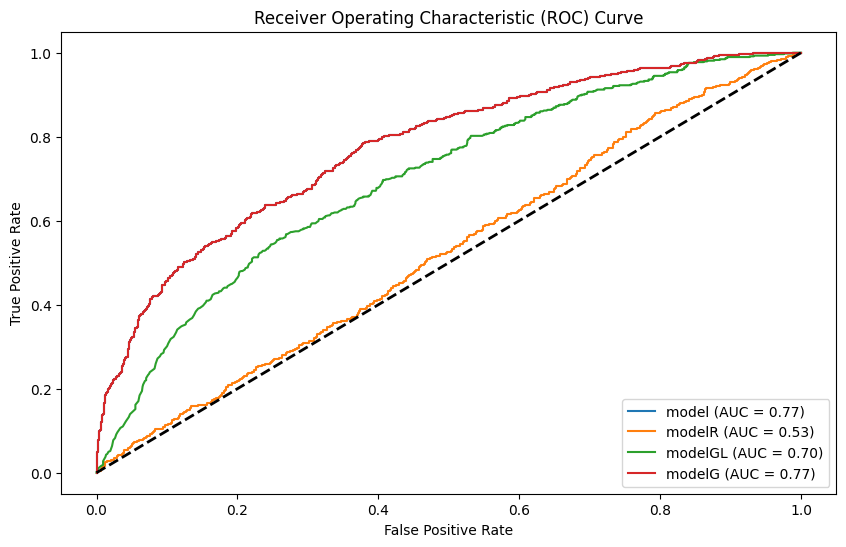

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load your data
tdf1 = pd.read_csv('/content/drive/MyDrive/a new RNA m6A/m5U/FULL/FUll separete dataset/ALL test F.csv')
df1 = pd.read_csv("/content/drive/MyDrive/a new RNA m6A/m5U/FULL/FUll separete dataset/ALL F features in one.csv")

# Assuming you have already trained your models
models = {
    'model': model,    # Define your 'model' here
    'modelR': modelR,  # Define your 'modelR' here
    'modelGL': modelGL,  # Define your 'modelGL' here
    'modelG': modelG    # Define your 'modelG' here
}

# Split your data into features and labels
X = df1.drop(columns=['Target'])  # Replace 'Target' with the actual target column name
y = df1['Target']

# Encode your labels if they are not binary (0, 1)
# This step is optional if your labels are already binary
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create a figure and axis for the ROC curve
plt.figure(figsize=(10, 6))

# For each model in your dictionary
for model_name, model in models.items():
    # Train the model (if it's not already trained)
    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot the ROC curve for random guessing (AUC = 0.5)
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Set axis labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Show the ROC curve plot
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load your data
tdf1 = pd.read_csv('/content/drive/MyDrive/a new RNA m6A/m5U/FULL/FUll separete dataset/ALL test F.csv')
df1 = pd.read_csv("/content/drive/MyDrive/a new RNA m6A/m5U/FULL/FUll separete dataset/ALL F features in one.csv")

# Assuming you have already trained your models
models = {
    'CNN-BiLSTM': model,    # Define your 'model' here
    'CNN-RNN-GRU-LSTM': modelR,  # Define your 'modelR' here
    'GRU-LSTM': modelGL,  # Define your 'modelGL' here
    'GRUpred-m5U': modelG    # Define your 'modelG' here
}

# Split your data into features and labels
X = pd.concat([df1.drop('Target', axis=1), tdf1.drop('Target', axis=1)], axis=0)
y = pd.concat([df1['Target'], tdf1['Target']], axis=0)

# Encode your labels if they are not binary (0, 1)
# This step is optional if your labels are already binary
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a figure and axis for the ROC curve
plt.figure(figsize=(6, 4))

# For each model in your dictionary
for model_name, model in models.items():
    # Train the model (if it's not already trained)
    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot the ROC curve for random guessing (AUC = 0.5)
plt.plot([0, 1], [0, 1],)

# Set axis labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Show the ROC curve plot
plt.show()


AttributeError: ignored

<Figure size 600x400 with 0 Axes>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load your data
tdf1 = pd.read_csv('/content/drive/MyDrive/a new RNA m6A/m5U/FULL/FUll separete dataset/ALL test F.csv')
df1 = pd.read_csv("/content/drive/MyDrive/a new RNA m6A/m5U/FULL/FUll separete dataset/ALL F features in one.csv")

# Assuming you have already trained your models
models = {
    'CNN-BiLSTM': model,    # Define your 'model' here
    'CNN-RNN-GRU-LSTM': modelR,  # Define your 'modelR' here
    'GRU-LSTM': modelGL,  # Define your 'modelGL' here
    'GRUpred-m5U': modelG    # Define your 'modelG' here
}

# Split your data into features and labels
X = pd.concat([df1.drop('Target', axis=1), tdf1.drop('Target', axis=1)], axis=0)
y = pd.concat([df1['Target'], tdf1['Target']], axis=0)

# Encode your labels if they are not binary (0, 1)
# This step is optional if your labels are already binary
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a figure and axis for the ROC curve
plt.figure(figsize=(6, 4))

# For each model in your dictionary
for model_name, model in models.items():
    # Train the model (if it's not already trained)
    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot the ROC curve for random guessing (AUC = 0.5)
plt.plot([0, 1], [0, 1],)

# Set axis labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Show the ROC curve plot
plt.show()


AttributeError: ignored

<Figure size 600x400 with 0 Axes>

AttributeError: ignored

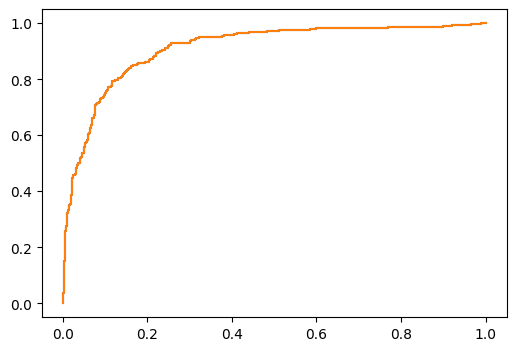

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load your data
tdf1 = pd.read_csv('/content/drive/MyDrive/a new RNA m6A/m5U/FULL/FUll separete dataset/ALL test F.csv')
df1 = pd.read_csv("/content/drive/MyDrive/a new RNA m6A/m5U/FULL/FUll separete dataset/ALL F features in one.csv")

# Define and train your machine learning models
from sklearn.ensemble import RandomForestClassifier  # Import an example model
from sklearn.linear_model import LogisticRegression  # Import another example model



# Define more models and train them as needed

# Assuming you have already trained your models
models = {
    'CNN-BiLSTM': model,    # Define your 'model' here
    'CNN-RNN-GRU-LSTM': modelR,  # Define your 'modelR' here
    'GRU-LSTM': modelGL,  # Define your 'modelGL' here
    'GRUpred-m5U': modelG    # Define your 'modelG' here
}

# Split your data into features and labels
X = pd.concat([df1.drop('Target', axis=1), tdf1.drop('Target', axis=1)], axis=0)
y = pd.concat([df1['Target'], tdf1['Target']], axis=0)

# Encode your labels if they are not binary (0, 1)
# This step is optional if your labels are already binary
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a figure and axis for the ROC curve
plt.figure(figsize=(6, 4))

# For each model in your dictionary
for model_name, model in models.items():
    # Make predictions on the test set
    y_pred = model.predict_proba(X_test)[:, 1]  # Use predict_proba for probability estimates

    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot the ROC curve for random guessing (AUC = 0.5)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing (AUC = 0.5)')

# Set axis labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Show the ROC curve plot
plt.show()


36/36 [==============================] - 0s 7ms/step


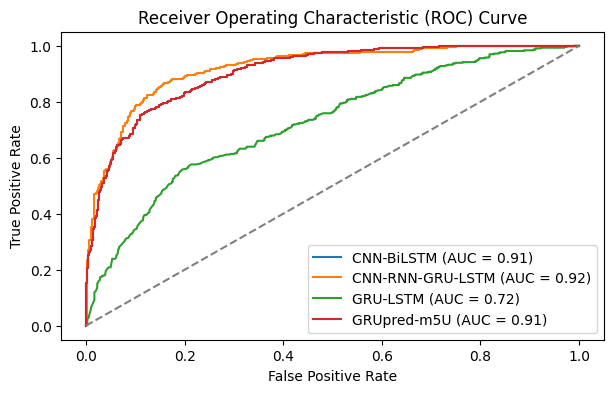

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load your data
tdf1 = pd.read_csv('/content/drive/MyDrive/a new RNA m6A/m5U/FULL/FUll separete dataset/ALL test F.csv')
df1 = pd.read_csv("/content/drive/MyDrive/a new RNA m6A/m5U/FULL/FUll separete dataset/ALL F features in one.csv")

# Define and train your machine learning models
from sklearn.ensemble import RandomForestClassifier  # Import an example model
from sklearn.linear_model import LogisticRegression  # Import another example model

# Define more models and train them as needed

# Assuming you have already trained your models
models = {
    'CNN-BiLSTM': model,    # Define your 'model' here
    'CNN-RNN-GRU-LSTM': modelR,  # Define your 'modelR' here
    'GRU-LSTM': modelGL,  # Define your 'modelGL' here
    'GRUpred-m5U': modelG    # Define your 'modelG' here
}

# Split your data into features and labels
X = pd.concat([df1.drop('Target', axis=1), tdf1.drop('Target', axis=1)], axis=0)
y = pd.concat([df1['Target'], tdf1['Target']], axis=0)

# Encode your labels if they are not binary (0, 1)
# This step is optional if your labels are already binary
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1042)

# Create a figure and axis for the ROC curve
plt.figure(figsize=(7, 4))

# For each model in your dictionary
for model_name, model in models.items():
    # Make predictions on the test set
    if hasattr(model, 'predict_proba'):
        y_pred = model.predict_proba(X_test)[:, 1]  # Use predict_proba for probability estimates
    else:
        y_pred = model.predict(X_test)
        y_pred = (y_pred - y_pred.min()) / (y_pred.max() - y_pred.min())  # Manually calculate probabilities

    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot the ROC curve for random guessing (AUC = 0.5)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Set axis labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# Show the ROC curve plot
plt.show()

71/71 [==============================] - 0s 6ms/step


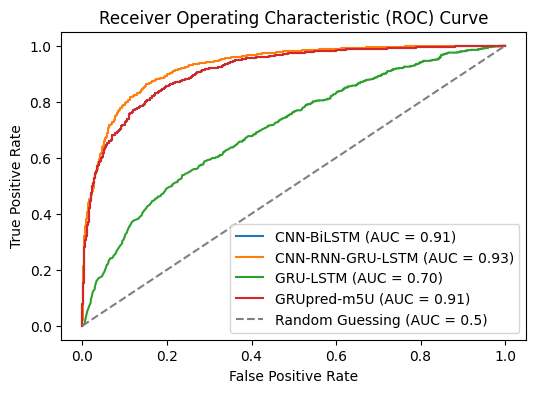

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load your data
tdf1 = pd.read_csv('/content/drive/MyDrive/a new RNA m6A/m5U/FULL/FUll separete dataset/ALL test F.csv')
df1 = pd.read_csv("/content/drive/MyDrive/a new RNA m6A/m5U/FULL/FUll separete dataset/ALL F features in one.csv")

# Define and train your machine learning models
from sklearn.ensemble import RandomForestClassifier  # Import an example model
from sklearn.linear_model import LogisticRegression  # Import another example model

# Define more models and train them as needed

# Assuming you have already trained your models
models = {
    'CNN-BiLSTM': model,    # Define your 'model' here
    'CNN-RNN-GRU-LSTM': modelR,  # Define your 'modelR' here
    'GRU-LSTM': modelGL,  # Define your 'modelGL' here
    'GRUpred-m5U': modelG    # Define your 'modelG' here
}

# Split your data into features and labels
X = pd.concat([df1.drop('Target', axis=1), tdf1.drop('Target', axis=1)], axis=0)
y = pd.concat([df1['Target'], tdf1['Target']], axis=0)

# Encode your labels if they are not binary (0, 1)
# This step is optional if your labels are already binary
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=142)

# Create a figure and axis for the ROC curve
plt.figure(figsize=(6, 4))

# For each model in your dictionary
for model_name, model in models.items():
    # Make predictions on the test set
    if hasattr(model, 'predict_proba'):
        y_pred = model.predict_proba(X_test)[:, 1]  # Use predict_proba for probability estimates
    else:
        y_pred = model.predict(X_test)
        y_pred = (y_pred - y_pred.min()) / (y_pred.max() - y_pred.min())  # Manually calculate probabilities

    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot the ROC curve for random guessing (AUC = 0.5)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing (AUC = 0.5)')

# Set axis labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Show the ROC curve plot
plt.show()

141/141 [==============================] - 1s 5ms/step


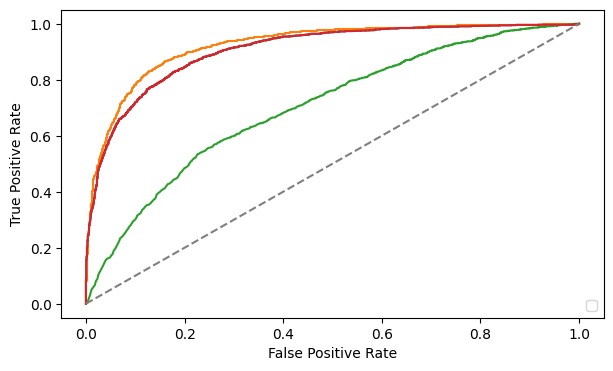

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load your data
tdf1 = pd.read_csv('/content/drive/MyDrive/a new RNA m6A/m5U/FULL/FUll separete dataset/ALL test F.csv')
df1 = pd.read_csv("/content/drive/MyDrive/a new RNA m6A/m5U/FULL/FUll separete dataset/ALL F features in one.csv")

# Define more models and train them as needed

# Assuming you have already trained your models
models = {
    'CNN-BiLSTM': model,    # Define your 'model' here
    'CNN-RNN-GRU-LSTM': modelR,  # Define your 'modelR' here
    'GRU-LSTM': modelGL,  # Define your 'modelGL' here
    'GRUpred-m5U': modelG    # Define your 'modelG' here
}

# Split your data into features and labels
X = pd.concat([df1.drop('Target', axis=1), tdf1.drop('Target', axis=1)], axis=0)
y = pd.concat([df1['Target'], tdf1['Target']], axis=0)

# Encode your labels if they are not binary (0, 1)
# This step is optional if your labels are already binary
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=1042)

# Create a figure and axis for the ROC curve
plt.figure(figsize=(7, 4))

# For each model in your dictionary
for model_name, model in models.items():
    # Make predictions on the test set
    if hasattr(model, 'predict_proba'):
        y_pred = model.predict_proba(X_test)[:, 1]  # Use predict_proba for probability estimates
    else:
        y_pred = model.predict(X_test)
        y_pred = (y_pred - y_pred.min()) / (y_pred.max() - y_pred.min())  # Manually calculate probabilities

    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.plot(fpr, tpr)

# Plot the ROC curve for random guessing (AUC = 0.5)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Set axis labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
# Save the resulting image as a JPEG file
plt.savefig('model1.jpg', format='jpg', dpi= 1500)
# Show the ROC curve plot
plt.show()

36/36 [==============================] - 0s 8ms/step


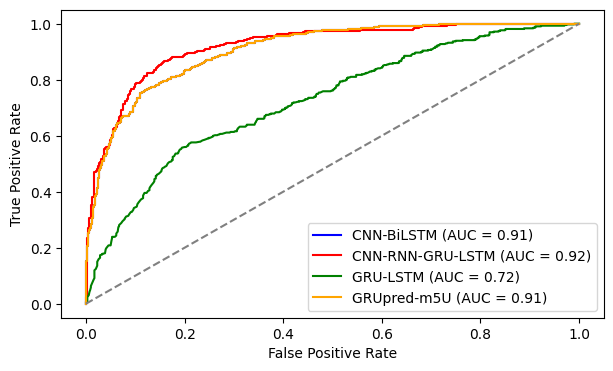

In [ ]:
# Create a figure and axis for the ROC curve
plt.figure(figsize=(7, 4))

# Define colors for each model
colors = ['blue', 'red', 'green', 'orange']

# For each model in your dictionary
for i, (model_name, model) in enumerate(models.items()):
    # Make predictions on the test set
    if hasattr(model, 'predict_proba'):
        y_pred = model.predict_proba(X_test)[:, 1]  # Use predict_proba for probability estimates
    else:
        y_pred = model.predict(X_test)
        y_pred = (y_pred - y_pred.min()) / (y_pred.max() - y_pred.min())  # Manually calculate probabilities

    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve with the corresponding color
    plt.plot(fpr, tpr, color=colors[i], label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot the ROC curve for random guessing (AUC = 0.5)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Set axis labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# Show the ROC curve plot
plt.show()

# pca

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


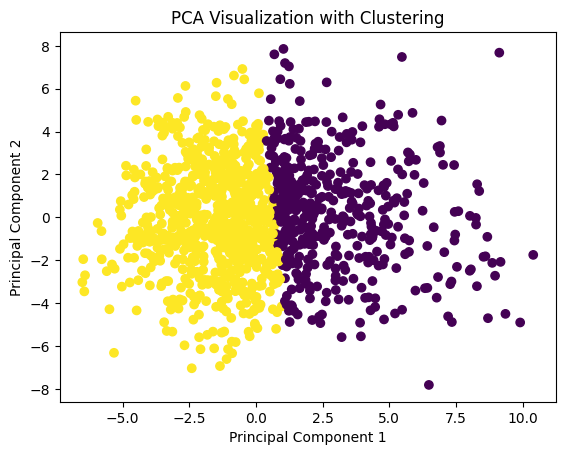

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset
tdf1 = pd.read_csv('/content/drive/MyDrive/a new RNA m6A/m5U/FULL/FUll separete dataset/ALL test F.csv')

# Extract features (exclude the target class)
X = tdf1.drop('Target', axis=1)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Apply clustering (KMeans)
kmeans = KMeans(n_clusters=2, random_state=142)
clusters = kmeans.fit_predict(X_pca)

# Visualize the clustered data
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title('PCA Visualization with Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


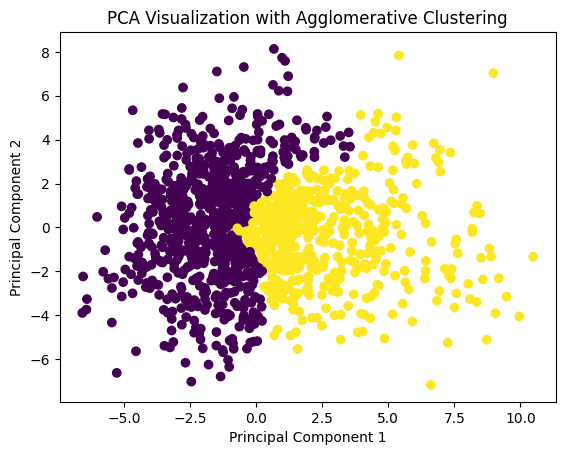

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Load the dataset
tdf1 = pd.read_csv('/content/drive/MyDrive/a new RNA m6A/m5U/FULL/FUll separete dataset/ALL test F.csv')

# Extract features (exclude the target class)
X = tdf1.drop('Target', axis=1)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Apply clustering (Agglomerative Clustering)
agg_cluster = AgglomerativeClustering(n_clusters=2)
clusters_agg = agg_cluster.fit_predict(X_pca)

# Visualize the clustered data using Agglomerative Clustering
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_agg, cmap='viridis')
plt.title('PCA Visualization with Agglomerative Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


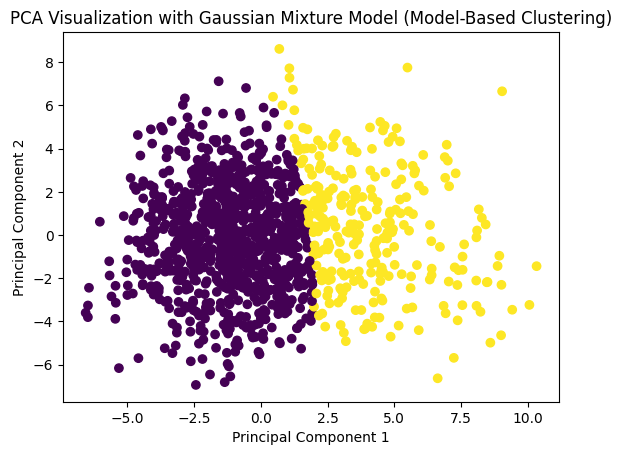

Gaussian Mixture Matrix:
[[0.80785667 0.19214333]
 [0.01729721 0.98270279]
 [0.86200576 0.13799424]
 ...
 [0.48074223 0.51925777]
 [0.08555891 0.91444109]
 [0.01469684 0.98530316]]


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Load the dataset
tdf1 = pd.read_csv('/content/drive/MyDrive/a new RNA m6A/m5U/FULL/FUll separete dataset/ALL test F.csv')

# Extract features (exclude the target class)
X = tdf1.drop('Target', axis=1)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Apply Gaussian Mixture Model (Model-Based Clustering)
gmm = GaussianMixture(n_components=2, random_state=442)
clusters = gmm.fit_predict(X_pca)

# Visualize the clustered data
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title('PCA Visualization with Gaussian Mixture Model (Model-Based Clustering)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Display the Gaussian Mixture Matrix
print("Gaussian Mixture Matrix:")
print(gmm.predict_proba(X_pca))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


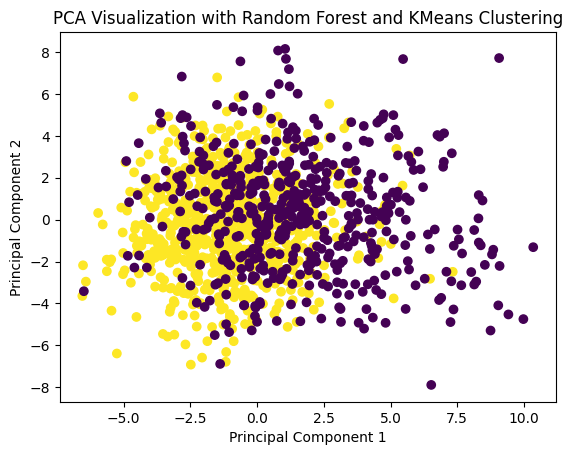

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset
tdf1 = pd.read_csv('/content/drive/MyDrive/a new RNA m6A/m5U/FULL/FUll separete dataset/ALL test F.csv')

# Extract features (exclude the target class)
X = tdf1.drop('Target', axis=1)
y = tdf1['Target']

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Train a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X, y)

# Get predicted class probabilities from the Random Forest model
class_probabilities = rf_classifier.predict_proba(X)

# Apply clustering (KMeans) on the predicted class probabilities
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(class_probabilities)

# Visualize the clustered data
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title('PCA Visualization with Random Forest and KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


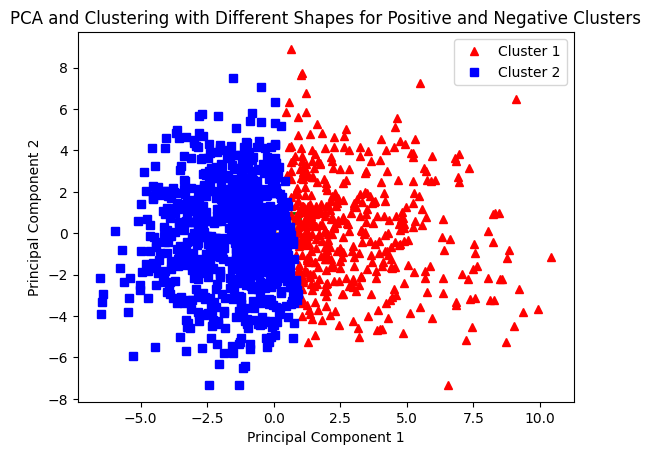

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Polygon

# Load your data
tdf1 = pd.read_csv('/content/drive/MyDrive/a new RNA m6A/m5U/FULL/FUll separete dataset/ALL test F.csv')

# Extract features (exclude the target class)
X = tdf1.drop('Target', axis=1)

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Perform clustering (adjust n_clusters as needed)
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Visualize clusters with different shapes
fig, ax = plt.subplots()

for cluster_num in range(n_clusters):
    cluster_points = X_pca[clusters == cluster_num]

    if cluster_num == 0:
        shape = 'r^'  # Red triangles for the first cluster
    else:
        shape = 'bs'  # Blue squares for the second cluster

    ax.plot(cluster_points[:, 0], cluster_points[:, 1], shape, label=f'Cluster {cluster_num + 1}')

# Add legend
ax.legend()

# Add rectangle and triangle to represent positive and negative clusters
positive_cluster = Rectangle((0, 0), 1, 1, fill=None, edgecolor='green', linewidth=2, label='Positive Cluster')
negative_cluster = Polygon(np.array([[0, 0], [1, 0], [0.5, 1]]), fill=None, edgecolor='orange', linewidth=2, label='Negative Cluster')

ax.add_patch(positive_cluster)
ax.add_patch(negative_cluster)

# Show the plot
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA and Clustering with Different Shapes for Positive and Negative Clusters')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


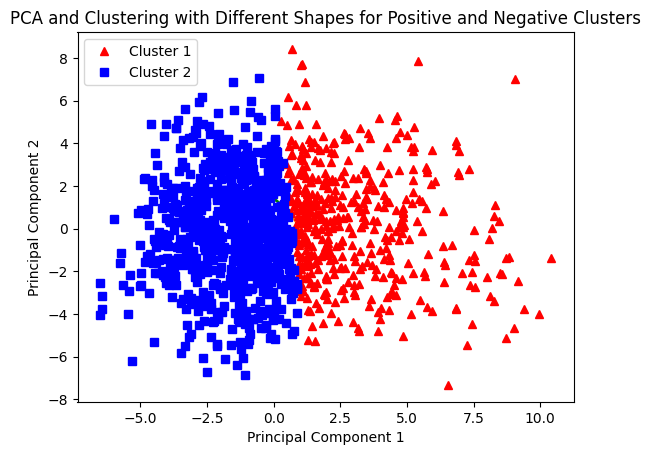

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Polygon

# Load your data
tdf1 = pd.read_csv('/content/drive/MyDrive/a new RNA m6A/m5U/FULL/FUll separete dataset/ALL test F.csv')

# Extract features (exclude the target class)
X = tdf1.drop('Target', axis=1)

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Perform clustering (adjust n_clusters as needed)
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Visualize clusters with different shapes
fig, ax = plt.subplots()

for cluster_num in range(n_clusters):
    cluster_points = X_pca[clusters == cluster_num]

    if cluster_num == 0:
        shape = 'r^'  # Red triangles for the first cluster
    else:
        shape = 'bs'  # Blue squares for the second cluster

    ax.plot(cluster_points[:, 0], cluster_points[:, 1], shape, label=f'Cluster {cluster_num + 1}')

# Add legend
ax.legend()

# Add rectangle and triangle to represent positive and negative clusters
positive_cluster = Rectangle((0, 0), 1, 1, angle=45, fill=None, edgecolor='green', linewidth=2, label='Positive Cluster')
negative_cluster = Polygon(np.array([[0, 0], [1, 0], [0.5, 1]]), fill=None, edgecolor='orange', linewidth=2, label='Negative Cluster')

ax.add_patch(positive_cluster)
ax.add_patch(negative_cluster)

# Show the plot
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA and Clustering with Different Shapes for Positive and Negative Clusters')
plt.show()


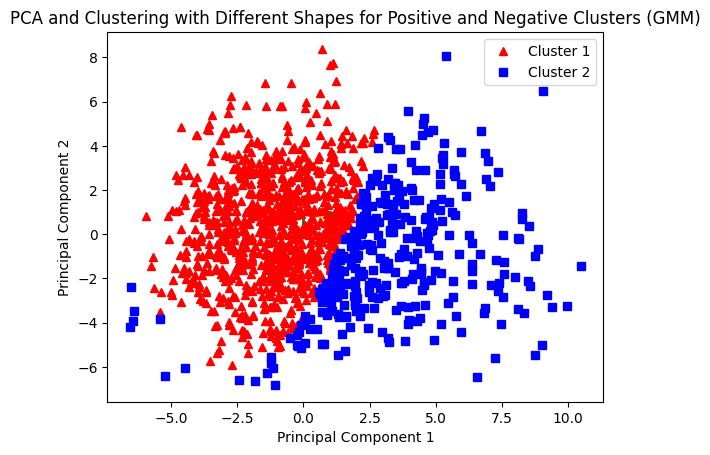

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Polygon

# Load your data
tdf1 = pd.read_csv('/content/drive/MyDrive/a new RNA m6A/m5U/FULL/FUll separete dataset/ALL test F.csv')

# Extract features (exclude the target class)
X = tdf1.drop('Target', axis=1)

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Perform clustering using Gaussian Mixture Model (GMM)
n_clusters = 2
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
clusters = gmm.fit_predict(X_pca)

# Visualize clusters with different shapes
fig, ax = plt.subplots()

for cluster_num in range(n_clusters):
    cluster_points = X_pca[clusters == cluster_num]

    if cluster_num == 0:
        shape = 'r^'  # Red triangles for the first cluster
    else:
        shape = 'bs'  # Blue squares for the second cluster

    ax.plot(cluster_points[:, 0], cluster_points[:, 1], shape, label=f'Cluster {cluster_num + 1}')

# Add legend
ax.legend()

# Add rectangle and triangle to represent positive and negative clusters
positive_cluster = Rectangle((0, 0), 1, 1, angle=0, fill=None, edgecolor='green', linewidth=2, label='Positive Cluster')
negative_cluster = Polygon(np.array([[0, 0], [1, 0], [0.5, 1]]), fill=None, edgecolor='orange', linewidth=2, label='Negative Cluster')

ax.add_patch(positive_cluster)
ax.add_patch(negative_cluster)

# Show the plot
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA and Clustering with Different Shapes for Positive and Negative Clusters (GMM)')
plt.show()


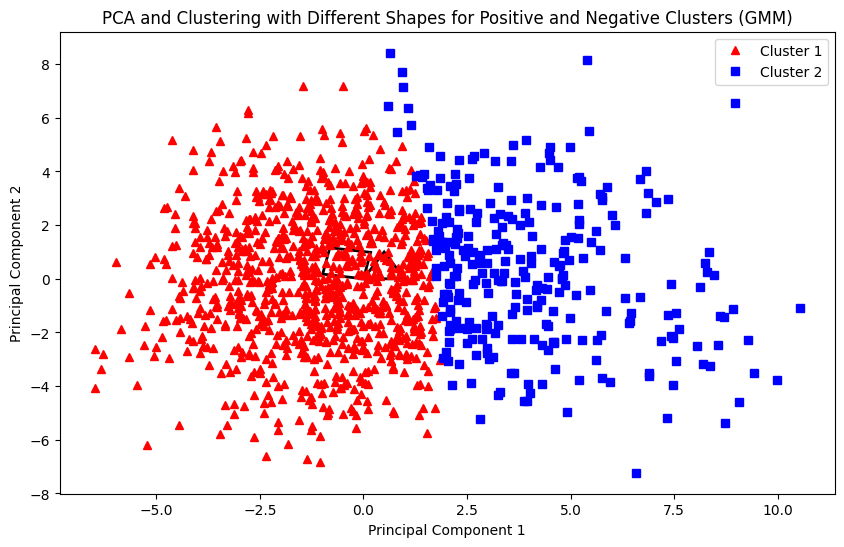

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Polygon

# Load your data
tdf1 = pd.read_csv('/content/drive/MyDrive/a new RNA m6A/m5U/FULL/FUll separete dataset/ALL test F.csv')

# Extract features (exclude the target class)
X = tdf1.drop('Target', axis=1)

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Perform clustering using Gaussian Mixture Model (GMM)
n_clusters = 2
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
clusters = gmm.fit_predict(X_pca)

# Set figure size with width increased along the x-axis
fig, ax = plt.subplots(figsize=(10, 6))

for cluster_num in range(n_clusters):
    cluster_points = X_pca[clusters == cluster_num]

    if cluster_num == 0:
        shape = 'r^'  # Red triangles for the first cluster
    else:
        shape = 'bs'  # Blue squares for the second cluster

    ax.plot(cluster_points[:, 0], cluster_points[:, 1], shape, label=f'Cluster {cluster_num + 1}')

# Add legend
ax.legend()

# Add rectangle and triangle to represent positive and negative clusters
positive_cluster = Rectangle((0, 0), 1, 1, angle=80, fill=None, linewidth=2, label='Positive Cluster')
negative_cluster = Polygon(np.array([[0, 0], [1, 0], [0.5, 1]]), fill=None, linewidth=2, label='Negative Cluster')

ax.add_patch(positive_cluster)
ax.add_patch(negative_cluster)

# Show the plot
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA and Clustering with Different Shapes for Positive and Negative Clusters (GMM)')
plt.show()


In [ ]:
pip install pandas scikit-learn matplotlib


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


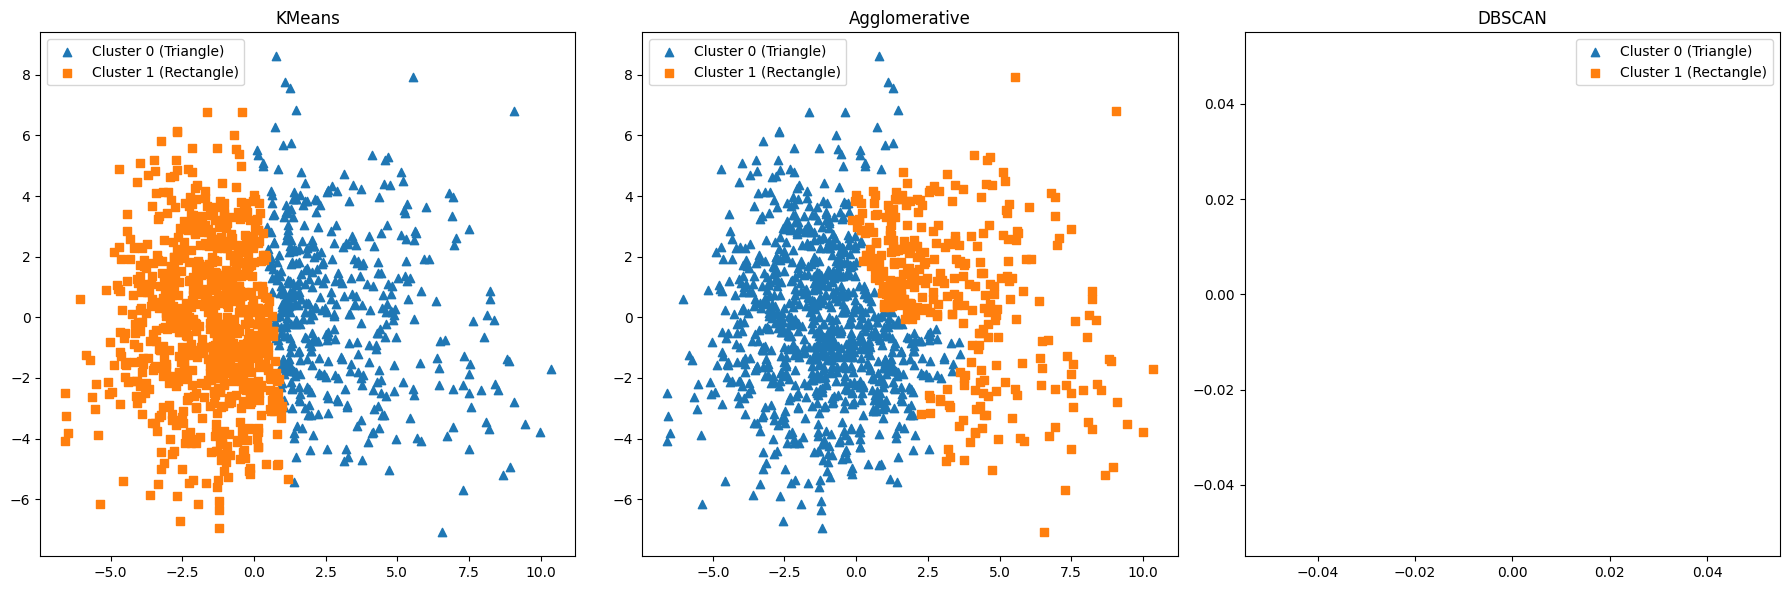

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, RegularPolygon

# Load your dataset
tdf1 = pd.read_csv('/content/drive/MyDrive/a new RNA m6A/m5U/FULL/FUll separete dataset/ALL test F.csv')

# Extract features (assuming all columns are numerical)
X = tdf1.iloc[:, 1:].values

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Define clustering algorithms
algorithms = {
    'KMeans': KMeans(n_clusters=2),
    'Agglomerative': AgglomerativeClustering(n_clusters=2),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=5)
}

# Plot clusters with different shapes
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for ax, (name, algorithm) in zip(axes, algorithms.items()):
    # Fit clustering algorithm
    if name == 'DBSCAN':
        labels = algorithm.fit_predict(X)
    else:
        labels = algorithm.fit_predict(X_pca)

    # Plot clusters
    for i in range(2):
        if i == 0:
            shape = 'Triangle'
            marker = '^'
        else:
            shape = 'Rectangle'
            marker = 's'
        ax.scatter(X_pca[labels == i, 0], X_pca[labels == i, 1], label=f'Cluster {i} ({shape})', marker=marker)

    ax.set_title(name)
    ax.legend()

plt.tight_layout()
plt.show()


ValueError: ignored

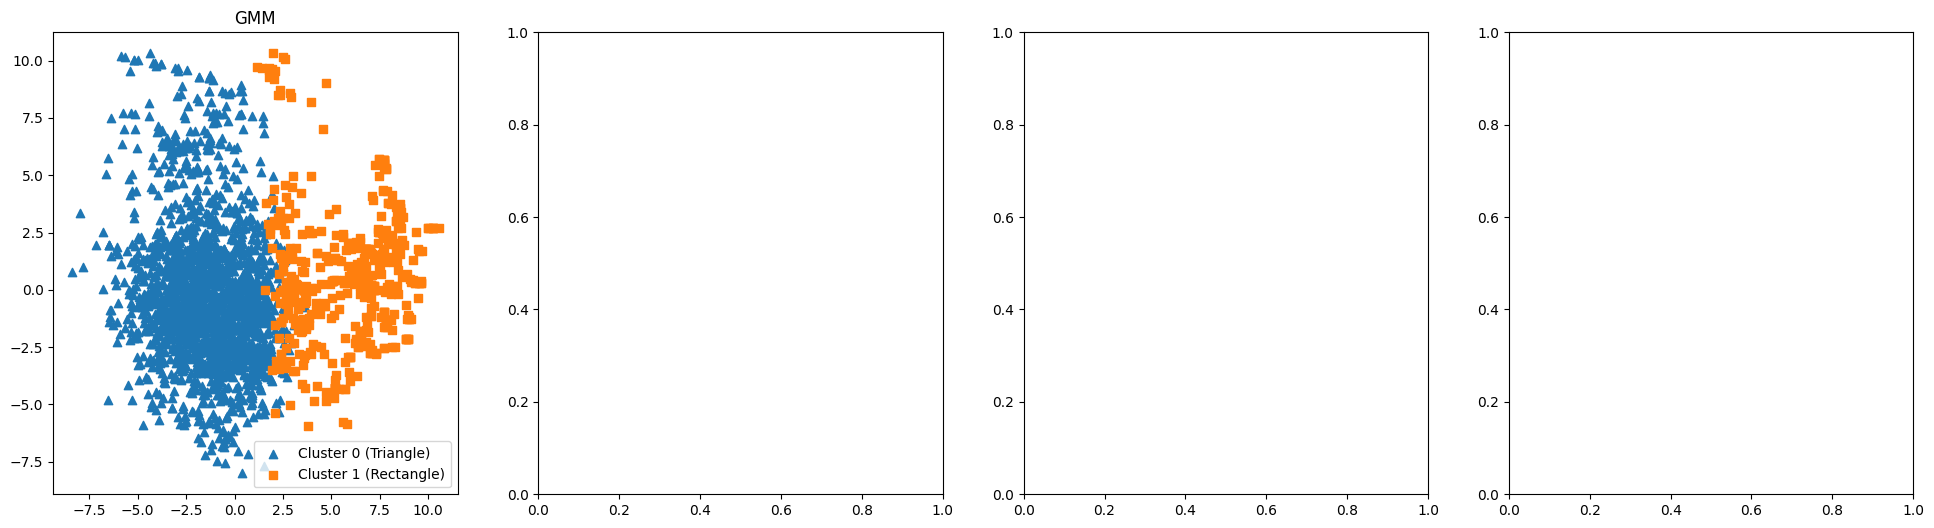

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, RegularPolygon

# Load your dataset
tdf1 = pd.read_csv("/content/drive/MyDrive/a new RNA m6A/m5U/FULL/FUll separete dataset/M-traine.csv")

# Extract features (assuming all columns are numerical)
X = tdf1.iloc[:, 1:].values

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Define clustering algorithms
algorithms = {
    'GMM': GaussianMixture(n_components=2),
    'LR': LogisticRegression(),
    'RF': RandomForestClassifier(n_estimators=100),
    'Ensemble': AgglomerativeClustering(n_clusters=2)  # You can replace AgglomerativeClustering with other ensemble methods
}

# Plot clusters with different shapes
fig, axes = plt.subplots(1, 4, figsize=(24, 6))

for ax, (name, algorithm) in zip(axes, algorithms.items()):
    # Fit clustering algorithm
    if name == 'GMM':
        labels = algorithm.fit_predict(X)
    elif name == 'LR':
        labels = algorithm.fit(X, y).predict(X)  # Replace 'y' with your target variable
    elif name == 'RF':
        labels = algorithm.fit(X, y).predict(X)  # Replace 'y' with your target variable
    elif name == 'Ensemble':
        # Assuming you have the predictions from GMM, LR, and RF in the variables gmm_labels, lr_labels, and rf_labels
        gmm_labels = GaussianMixture(n_components=2).fit_predict(X)
        lr_labels = LogisticRegression().fit(X, y).predict(X)  # Replace 'y' with your target variable
        rf_labels = RandomForestClassifier(n_estimators=100).fit(X, y).predict(X)  # Replace 'y' with your target variable
        ensemble_labels = AgglomerativeClustering(n_clusters=2).fit_predict([gmm_labels, lr_labels, rf_labels])

    # Plot clusters
    for i in range(2):
        if i == 0:
            shape = 'Triangle'
            marker = '^'
        else:
            shape = 'Rectangle'
            marker = 's'
        ax.scatter(X_pca[labels == i, 0], X_pca[labels == i, 1], label=f'Cluster {i} ({shape})', marker=marker)

    ax.set_title(name)
    ax.legend()

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering, Birch, MeanShift, AffinityPropagation, OPTICS, MiniBatchKMeans
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

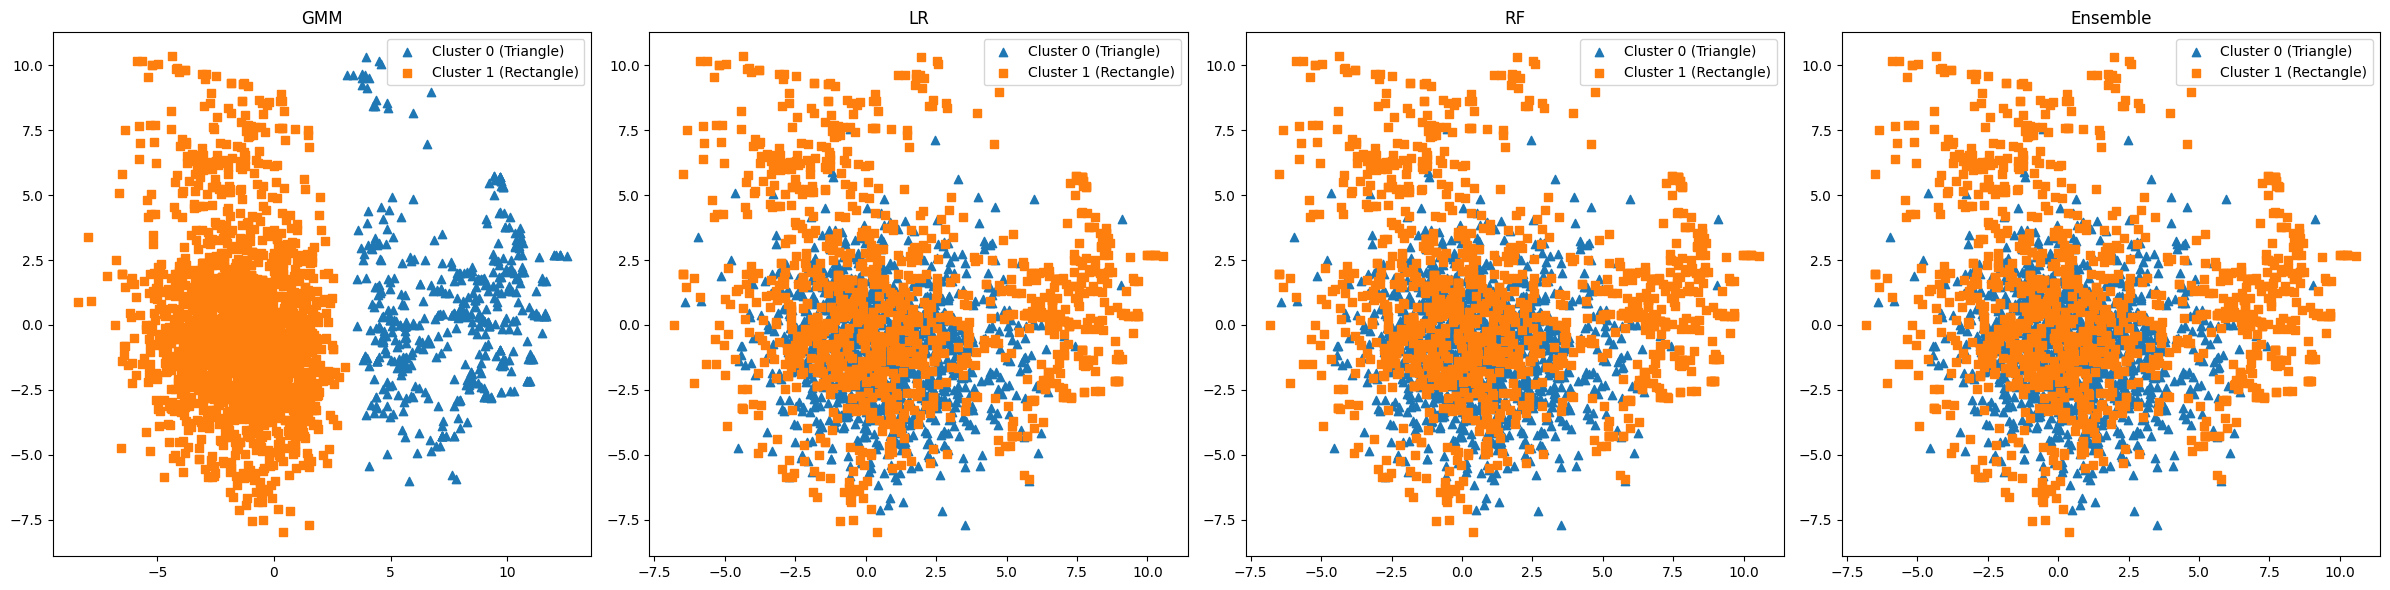

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Load your dataset
tdf1 = pd.read_csv("/content/drive/MyDrive/a new RNA m6A/m5U/FULL/FUll separete dataset/M-traine.csv")

# Extract features (assuming all columns are numerical)
X = tdf1.iloc[:, 1:].values

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Define clustering algorithms
algorithms = {
    'GMM': GaussianMixture(n_components=2),
    'LR': LogisticRegression(),
    'RF': RandomForestClassifier(n_estimators=100),
    'Ensemble': AgglomerativeClustering(n_clusters=2)  # You can replace AgglomerativeClustering with other ensemble methods
}

# Plot clusters with increased distance between them
fig, axes = plt.subplots(1, 4, figsize=(24, 6))

for ax, (name, algorithm) in zip(axes, algorithms.items()):
    # Fit clustering algorithm
    if name == 'GMM':
        labels = algorithm.fit_predict(X)
    elif name == 'LR':
        labels = algorithm.fit(X, y).predict(X)  # Replace 'y' with your target variable
    elif name == 'RF':
        labels = algorithm.fit(X, y).predict(X)  # Replace 'y' with your target variable
    elif name == 'Ensemble':
        # Assuming you have the predictions from GMM, LR, and RF in the variables gmm_labels, lr_labels, and rf_labels
        gmm_labels = GaussianMixture(n_components=2).fit_predict(X)
        lr_labels = LogisticRegression().fit(X, y).predict(X)  # Replace 'y' with your target variable
        rf_labels = RandomForestClassifier(n_estimators=100).fit(X, y).predict(X)  # Replace 'y' with your target variable
        ensemble_labels = AgglomerativeClustering(n_clusters=2).fit_predict([gmm_labels, lr_labels, rf_labels])

    # Increase distance between clusters
    for i in range(2):
        if i == 0:
            shape = 'Triangle'
            marker = '^'
            # Increase distance between cluster 0 points
            offset = 2.0
            ax.scatter(X_pca[labels == i, 0] + offset, X_pca[labels == i, 1], label=f'Cluster {i} ({shape})', marker=marker)
        else:
            shape = 'Rectangle'
            marker = 's'
            ax.scatter(X_pca[labels == i, 0], X_pca[labels == i, 1], label=f'Cluster {i} ({shape})', marker=marker)

    ax.set_title(name)
    ax.legend()

plt.tight_layout()
plt.show()


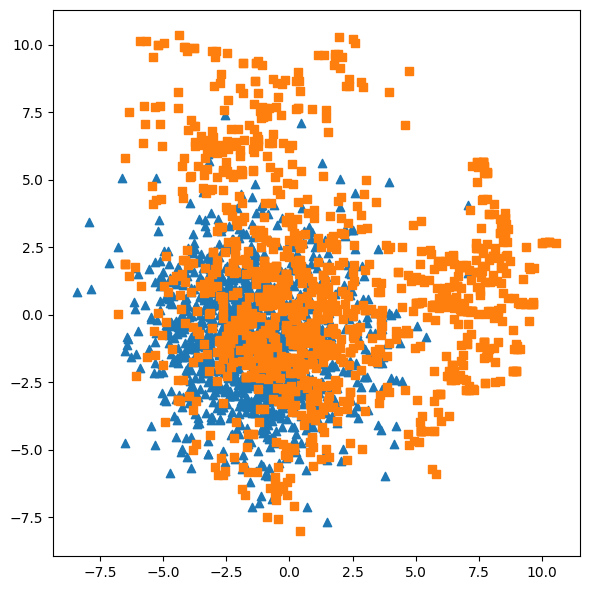

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load your dataset
tdf1 = pd.read_csv("/content/drive/MyDrive/a new RNA m6A/m5U/FULL/FUll separete dataset/M-traine.csv")

# Assuming your dataset has a target variable 'y' with two classes (0 and 1)
# Replace 'y' with your actual target variable name
X = tdf1.iloc[:, 1:].values
y = tdf1['Target']  # Replace 'target' with your actual target variable name

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the original dataset with two classes
fig, ax = plt.subplots(figsize=(6, 6))

# Plot points for Class 0
ax.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], marker='^' )

# Plot points for Class 1
ax.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], marker='s')



plt.tight_layout()
plt.show()


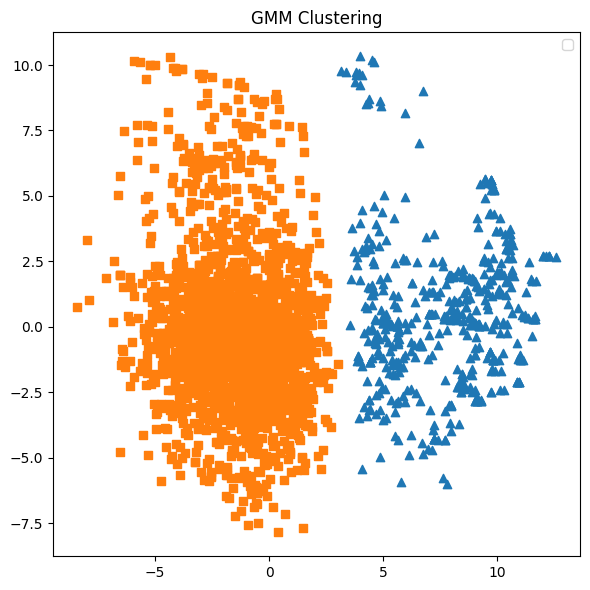

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Load your dataset
tdf1 = pd.read_csv("/content/drive/MyDrive/a new RNA m6A/m5U/FULL/FUll separete dataset/M-traine.csv")

# Extract features (assuming all columns are numerical)
X = tdf1.iloc[:, 1:].values

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Define GMM clustering algorithm
gmm = GaussianMixture(n_components=2)
labels = gmm.fit_predict(X)

# Increase distance between clusters
fig, ax = plt.subplots(figsize=(6, 6))

for i in range(2):
    if i == 0:
        shape = 'non-m5U'
        marker = '^'
        # Increase distance between cluster 0 points
        offset = 2.0
        ax.scatter(X_pca[labels == i, 0] + offset, X_pca[labels == i, 1], marker=marker)
    else:
        shape = 'm5U'
        marker = 's'
        ax.scatter(X_pca[labels == i, 0], X_pca[labels == i, 1], marker=marker)

ax.set_title('GMM Clustering')
ax.legend()

plt.tight_layout()
plt.show()


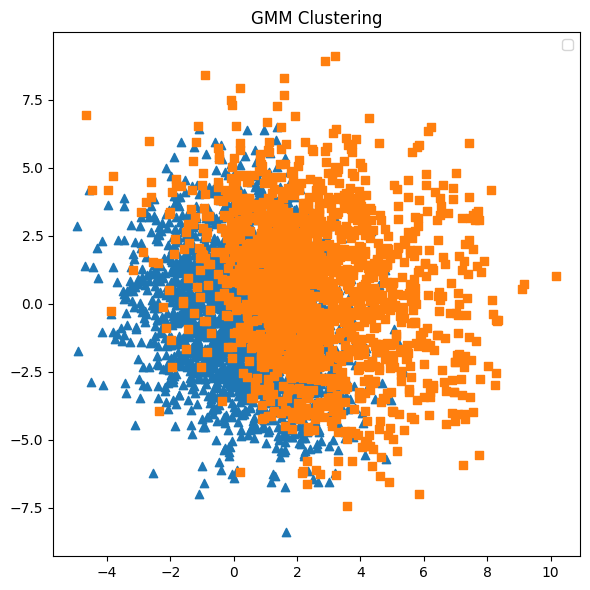

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Load your dataset
tdf1 = pd.read_csv("/content/drive/MyDrive/a new RNA m6A/m5U/FULL/FUll separete dataset/ALL F features in one.csv")

# Extract features (assuming all columns are numerical)
X = tdf1.iloc[:, 1:].values

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Define GMM clustering algorithm
gmm = GaussianMixture(n_components=2)
labels = gmm.fit_predict(X)

# Increase distance between clusters
fig, ax = plt.subplots(figsize=(6, 6))

for i in range(2):
    if i == 0:
        shape = 'non-m5U'
        marker = '^'
        # Increase distance between cluster 0 points
        offset = 2.0
        ax.scatter(X_pca[labels == i, 0] + offset, X_pca[labels == i, 1], marker=marker)
    else:
        shape = 'm5U'
        marker = 's'
        ax.scatter(X_pca[labels == i, 0], X_pca[labels == i, 1],marker=marker)

ax.set_title('GMM Clustering')
ax.legend()

plt.tight_layout()
plt.show()


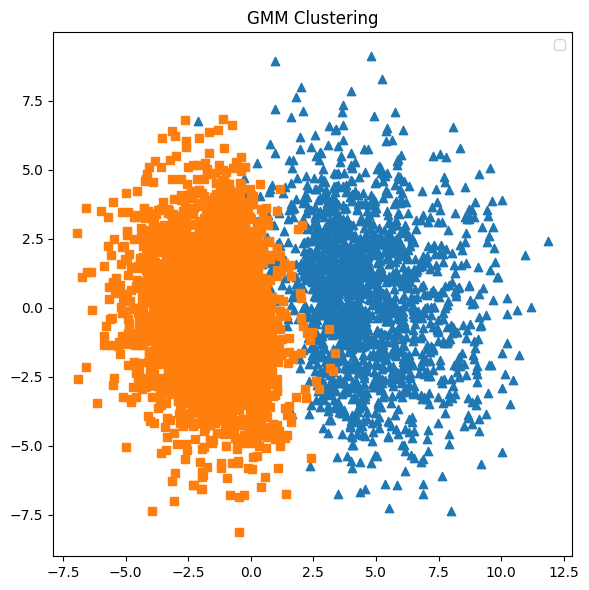

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Load your dataset
tdf1 = pd.read_csv("/content/drive/MyDrive/a new RNA m6A/m5U/FULL/FUll separete dataset/ALL F features in one.csv")

# Extract features (assuming all columns are numerical)
X = tdf1.iloc[:, 1:].values

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Define GMM clustering algorithm
gmm = GaussianMixture(n_components=2)
labels = gmm.fit_predict(X)

# Increase distance between clusters
fig, ax = plt.subplots(figsize=(6, 6))

for i in range(2):
    if i == 0:
        shape = 'non-m5U'
        marker = '^'
        # Increase distance between cluster 0 points
        offset = 2.0
        ax.scatter(X_pca[labels == i, 0] + offset, X_pca[labels == i, 1], marker=marker)
    else:
        shape = 'm5U'
        marker = 's'
        ax.scatter(X_pca[labels == i, 0], X_pca[labels == i, 1], marker=marker)

ax.set_title('GMM Clustering')
ax.legend()

plt.tight_layout()
plt.show()
